# 2 Layer Neural Network from Scratch 
---
#### In this notebook, we will be building a 2 layer neural network (a neural network with one hidden layer), completely from scratch using just NumPy. 
#### The goal of this notebook is to really understand how the data flows through the neural network, how the weights and biases get updated, and how the matrix multiplications transform the inputs and activations in a neural network.
---
This notebook assumes you are familiar with logistic regression, Matrix multiplication and Gradient Descent, which I discussed in earlier notebook [Logistic Regression from Scratch](https://github.com/vikrawar/from-scratch-logistic-regression)

## Generating training data

Let's say we have 10 training examples, each having 4 features. 
We'll stack them as column vectors in a matrix `X`. 
Their corresponding binary labels will be in a horizontal array `Y`. <br>

X:
\begin{bmatrix}
\vert & \vert & \vert & \vert & \vert & \vert & \vert & \vert & \vert & \vert \\
x_1 & x_2 & x_3 & x_4 & x_5 & x_6 & x_7 & x_8 & x_9 & x_10 \\
\vert & \vert & \vert & \vert & \vert & \vert & \vert & \vert & \vert & \vert \\
\end{bmatrix}

Y:
\begin{bmatrix} y_1 & y_2 & y_3 & y_4 & y_5 & y_6 & y_7 & y_8 & y_9 & y_10 \end{bmatrix}


Note on notation: <br>
Don't get hung up on the notation and terminology. 
Some people prefer to have the training data stacked as rows. 
At the end of the day, it doesn't matter as long as the Matrix multiplications work out.

In [1]:
import numpy as np

X = np.array([
    [0.1, 0.2, 0.9, 0.8, 0.9, 0.4, 0.4, 0.6, 0.7, 0.32],
    [0.3, 0.2, 0.7, 0.8, 0.8, 0.5, 0.3, 0.5, 0.6, 0.33], 
    [0.9, 0.7, 0.3, 0.1, 0.15, 0.3, 0.5, 0.3, 0.2, 0.88],
    [0.7, 0.7, 0.1, 0.1, 0.19, 0.01, 0.7, 0.4, 0.49, 0.55],
])

Y = np.array([1., 1., 0., 0., 0., 1., 1., 0., 0., 1.])

X, Y

(array([[0.1 , 0.2 , 0.9 , 0.8 , 0.9 , 0.4 , 0.4 , 0.6 , 0.7 , 0.32],
        [0.3 , 0.2 , 0.7 , 0.8 , 0.8 , 0.5 , 0.3 , 0.5 , 0.6 , 0.33],
        [0.9 , 0.7 , 0.3 , 0.1 , 0.15, 0.3 , 0.5 , 0.3 , 0.2 , 0.88],
        [0.7 , 0.7 , 0.1 , 0.1 , 0.19, 0.01, 0.7 , 0.4 , 0.49, 0.55]]),
 array([1., 1., 0., 0., 0., 1., 1., 0., 0., 1.]))

## Understanding the structure of our Neural Network 

- Input layer: 4 nodes (as our inputs have 4 features)
- Hidden layer: 2 nodes
- Output layer: 1 node (as this is binary classification)

Our neural network will be fully connected. This means each neuron in a layer is connected to (read: influences) every neuron in the next layer.

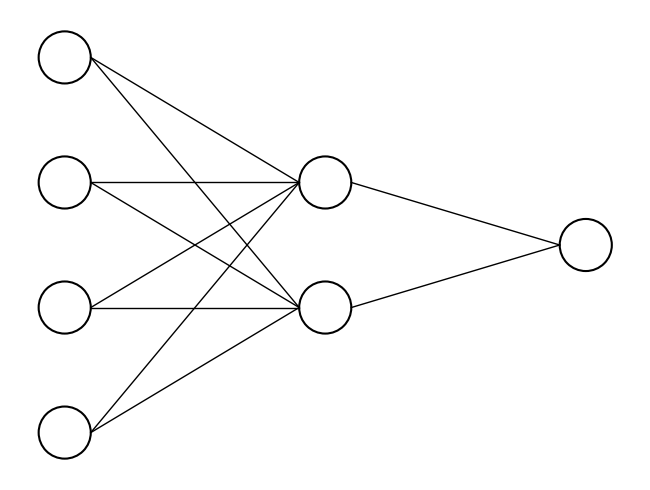

In [2]:
# Skip this code cell
import matplotlib.pyplot as plt

def draw_neural_net(ax, layers):
    v_spacing = 1.2
    h_spacing = 2.5
    radius = 0.25
    node_coords = []

    # Compute coordinates
    for i, n_nodes in enumerate(layers):
        layer_coords = []
        top = (n_nodes - 1) * v_spacing / 2
        for j in range(n_nodes):
            layer_coords.append((i * h_spacing, top - j * v_spacing))
        node_coords.append(layer_coords)

    # Draw edges
    for i in range(len(node_coords) - 1):
        for (x1, y1) in node_coords[i]:
            for (x2, y2) in node_coords[i + 1]:
                ax.plot([x1 + radius, x2 - radius], [y1, y2], 'k-', lw=1)

    # Draw nodes
    for layer in node_coords:
        for (x, y) in layer:
            circle = plt.Circle((x, y), radius, fill=False, color='black', lw=1.5)
            ax.add_patch(circle)

    ax.set_aspect('equal')
    ax.axis('off')

fig, ax = plt.subplots(figsize=(8, 5))
draw_neural_net(ax, layers=[4, 2, 1])
plt.tight_layout()
plt.show()

### Initializing weights and biases

We will need two sets of weights and biases for our 2 layer Neural Network. <br>
You can think of each connection (line) between two nodes as having a weight. Therefore, the weights matrix connecting the inputs to the hidden layer will have dimension 2x4. Similarly, the weight matrix connecting the hidden layer to the output layer will have dimensions 1x2. 

And the number of outputs of a layer (aka activations) will be the number of biases that particular layer will need to have. 
So, the first bias matrix will have dimensions 1x2, and the second one will be 1x1.

In [3]:
W1, b1 = np.random.random((2, 4)) - 0.5, np.random.random((2, 1)) - 0.5
W1, b1

(array([[ 0.12224835,  0.18465204, -0.27295901, -0.33322395],
        [ 0.11280868,  0.07313117,  0.33981622, -0.3146185 ]]),
 array([[-0.47820851],
        [-0.23881715]]))

In [4]:
Z1 = W1 @ X + b1
Z1

array([[-0.88950794, -0.8411565 , -0.35413866, -0.29330649, -0.32471976,
        -0.42220309, -0.74364983, -0.52771076, -0.49971498, -0.80163097],
       [-0.11999529, -0.18399078, -0.0156145 , -0.0875455 , -0.08758948,
        -0.05832941, -0.22207917, -0.15846889, -0.20217219, -0.05258699]])

In [5]:
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

In [6]:
A1 = sigmoid(Z1)
A1

array([[0.29121138, 0.30129127, 0.41237917, 0.42719458, 0.41952594,
        0.39598969, 0.32220654, 0.37105097, 0.37760765, 0.30967675],
       [0.47003712, 0.45413163, 0.49609645, 0.47812759, 0.47811662,
        0.48542178, 0.44470727, 0.46046548, 0.44962841, 0.48685628]])

In [7]:
W2, b2 = np.random.random((1, 2)) - 0.5, np.random.random((1, 1)) - 0.5
W2, b2

(array([[ 0.44282902, -0.02181684]]), array([[-0.27406987]]))

In [8]:
Z2 = W2 @ A1 + b2
A2 = sigmoid(Z2)
A2

array([[0.46123601, 0.46243167, 0.47445235, 0.47618629, 0.47533937,
        0.47270105, 0.464786  , 0.47008486, 0.47086711, 0.46317737]])

## Loss and Cost

In [9]:
def loss(A, Y):
    # A = predicted probabilities
    # Y = true labels

    # 0.01 is added to prevent accidental calculation of log(0)
    return -(Y*np.log(A+0.01) + (1-Y)*np.log((1-A)+0.01))

def cost(loss): 
    return np.average(loss)

In [10]:
loss(A2, Y)

array([[0.75239623, 0.74986216, 0.62446541, 0.62770836, 0.62612308,
        0.72835777, 0.7448911 , 0.61634331, 0.61779318, 0.74828498]])

In [11]:
cost(loss(A2, Y))

0.683622557508922

## Learning

We will now train the neural network using backpropagation. This involves computing the gradient of the cost with respect to each parameter and updating them via gradient descent.

In [12]:
costs = []

for epoch in range(25): 

    # Forwad pass
    Z1 = W1 @ X + b1
    A1 = sigmoid(Z1)
    Z2 = W2 @ A1 + b2
    A2 = sigmoid(Z2)

    # Backward pass
    dZ2 = A2 - Y
    dw2 = dZ2 @ A1.T  # (1x4) @ (4x2) → (1x2)
    db2 = dZ2.mean(axis=1, keepdims=True)

    dZ1 = (W2.T @ dZ2) * A1 * (1 - A1)
    dw1 = dZ1 @ X.T # (2x4) @ (4x2) -> (2x2)
    db1 = dZ1.mean(axis=1, keepdims=True)

    # Updating the parameters
    W1 -= dw1
    b1 -= db1
    W2 -= dw2
    b2 -= db2
    
    A1 = sigmoid(W1 @ X + b1)
    A2 = sigmoid(W2 @ A1 + b2)

    # Tracking the cost
    the_cost = cost(loss(Y, A2))
    costs.append(the_cost)

    print(f"{epoch=}")
    print(f"{the_cost=}")
    print("=====")

epoch=0
the_cost=2.306360487991625
=====
epoch=1
the_cost=2.2990198885982864
=====
epoch=2
the_cost=2.2919546549893197
=====
epoch=3
the_cost=2.2818819595330266
=====
epoch=4
the_cost=2.265829354628262
=====
epoch=5
the_cost=2.239640059137911
=====
epoch=6
the_cost=2.1975082201158633
=====
epoch=7
the_cost=2.1325792167081703
=====
epoch=8
the_cost=2.039653269998668
=====
epoch=9
the_cost=1.9201681727277014
=====
epoch=10
the_cost=1.7850582169451599
=====
epoch=11
the_cost=1.6497292372053693
=====
epoch=12
the_cost=1.5255491793355502
=====
epoch=13
the_cost=1.4170857672700479
=====
epoch=14
the_cost=1.3243868384348192
=====
epoch=15
the_cost=1.2456181809695195
=====
epoch=16
the_cost=1.1785225973155191
=====
epoch=17
the_cost=1.1209992031414184
=====
epoch=18
the_cost=1.0712667227728683
=====
epoch=19
the_cost=1.027867826748566
=====
epoch=20
the_cost=0.9896243119452262
=====
epoch=21
the_cost=0.955584327861442
=====
epoch=22
the_cost=0.9249751943856236
=====
epoch=23
the_cost=0.8971650

## Plotting the Cost

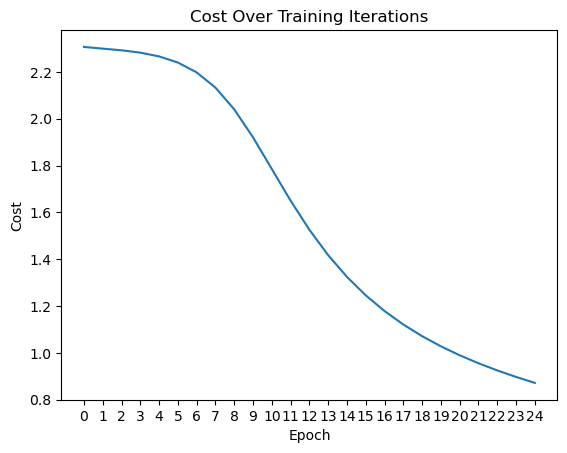

In [13]:
plt.plot(costs)
plt.title("Cost Over Training Iterations")
plt.xticks(np.arange(0, 25))
plt.xlabel("Epoch")
plt.ylabel("Cost");

It looks like the cost will continue to decrease if we continue training our neural network

### But is our model predicting the data correctly?

In [14]:
print("Predictions:")
print(A2.round(3))
print("Actual:")
print(Y)

Predictions:
[[0.993 0.986 0.206 0.188 0.186 0.453 0.892 0.375 0.262 0.983]]
Actual:
[1. 1. 0. 0. 0. 1. 1. 0. 0. 1.]


In [15]:
preds = np.where(A2 < 0.5, 0, 1)
print(f"Predicted: {preds}")
print(f"Actual: {Y}")

Predicted: [[1 1 0 0 0 0 1 0 0 1]]
Actual: [1. 1. 0. 0. 0. 1. 1. 0. 0. 1.]


In [16]:
accuracy = (preds == Y).mean() * 100
print(f"Accuracy: {accuracy:.1f}%")

Accuracy: 90.0%


Looks like our neural network misclassified one label. <br>
But keep in mind, we only trained the network for 25 epochs, and the cost was still steadily decreasing. Neural Networks are powerful, and given enough layers and parameters, they can theoretically drive the cost to 0!

---

# Wrap-Up

In this notebook, we built a **2-layer neural network from scratch** using only NumPy.

We explored:
- How inputs are transformed layer by layer using weights, biases, and activations
- How to implement **backpropagation**
- How to update parameters with **gradient descent**
- And most importantly, how matrix multiplication works in neural networks


We trained our 2-layer Neural Net on a small dataset and achieved 90% accuracy after just 25 epochs. The cost was still decreasing so we could have trained more and improved performance.

I hope this exercise deepened your intuition behind how gradients flow through each layer and how weight updates impact learning. Hopefully this also strengthened your understanding of matrix shapes and multiplications and helped build a mental model of how neural networks operate under the hood.

---

Thanks for following along!  
If you found this helpful, consider ⭐️ the repo or sharing it with someone learning deep learning.